In [1]:
import math
import matplotlib.pyplot as plt

In [4]:
N_vals = []
S_wide_vals = []
S_narrow_vals = []

with open("data.txt", "r") as f:
    next(f)
    for line in f:
        line = line.strip()
        if not line:
            continue
        parts = line.split()
        if len(parts) != 3:
            continue
        n = int(parts[0])
        sw = float(parts[1])
        sn = float(parts[2])

        N_vals.append(n)
        S_wide_vals.append(sw)
        S_narrow_vals.append(sn)

In [6]:

S_exact = 0.25 * math.pi + 1.25 * math.asin(0.8) - 1.0
print("Точная площадь:", S_exact)

Точная площадь: 0.9445171858994637


In [7]:
err_wide = [abs(sw - S_exact) / S_exact for sw in S_wide_vals]
err_narrow = [abs(sn - S_exact) / S_exact for sn in S_narrow_vals]

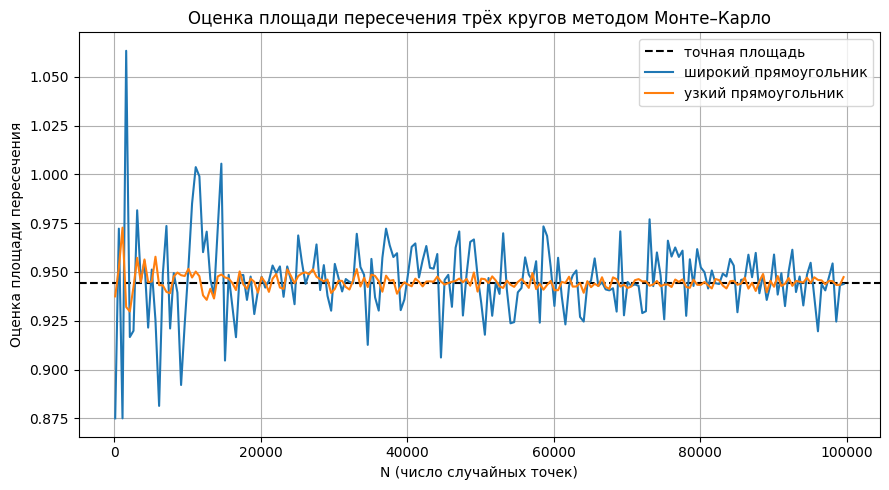

In [8]:
plt.figure(figsize=(9, 5))
plt.axhline(S_exact, color="black", linestyle="--", label="точная площадь")
plt.plot(N_vals, S_wide_vals, label="широкий прямоугольник")
plt.plot(N_vals, S_narrow_vals, label="узкий прямоугольник")
plt.xlabel("N (число случайных точек)")
plt.ylabel("Оценка площади пересечения")
plt.title("Оценка площади пересечения трёх кругов методом Монте–Карло")
plt.legend()
plt.grid(True)
plt.tight_layout()

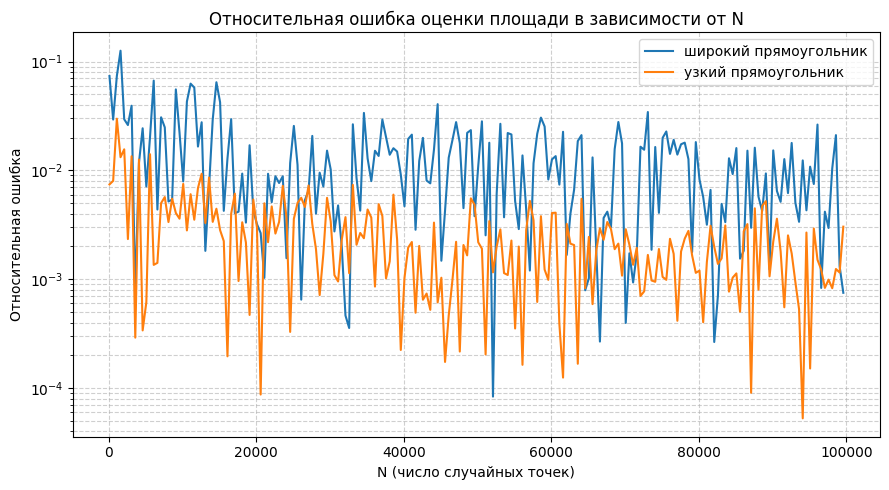

In [9]:
plt.figure(figsize=(9, 5))
plt.plot(N_vals, err_wide, label="широкий прямоугольник")
plt.plot(N_vals, err_narrow, label="узкий прямоугольник")
plt.xlabel("N (число случайных точек)")
plt.ylabel("Относительная ошибка")
plt.yscale("log")  # удобно смотреть спад ~ 1/sqrt(N)
plt.title("Относительная ошибка оценки площади в зависимости от N")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.tight_layout()

plt.show()